<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ingest Data**

**This will download the book**

In [55]:
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/oldmansea-book.txt

--2021-02-25 08:10:14--  https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/oldmansea-book.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134520 (131K) [text/plain]
Saving to: ‘oldmansea-book.txt.2’

oldmansea-book.txt. 100%[===================>] 131.37K  --.-KB/s    in 0.01s   

2021-02-25 08:10:15 (13.1 MB/s) - ‘oldmansea-book.txt.2’ saved [134520/134520]



In [56]:
!head oldmansea-book.txt

THE OLD MAN AND THE SEA




He was an old man who fished alone in a skiff in the Gulf Stream and he
had gone eighty-four days now without taking a fish.  In the first
forty days a boy had been with him.  But after forty days without a
fish the boy's parents had told him that the old man was now definitely
and finally _salao_, which is the worst form of unlucky, and the boy


In [57]:
!tail oldmansea-book.txt

"Tiburon," the waiter said, "Eshark."  He was meaning to explain what
had happened.

"I didn't know sharks had such handsome, beautifully formed tails."

"I didn't either," her male companion said.

Up the road, in his shack, the old man was sleeping again.  He was
still sleeping on his face and the boy was sitting by him watching him.
The old man was dreaming about the lions.


In [58]:
from pathlib import Path
import spacy

# **Document Similarity**

# **Word Visualizations**

In [59]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [60]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [61]:
stop_words = stopwords.words('english')

In [62]:
type(stop_words)

list

In [63]:
oms_blob = TextBlob(Path('oldmansea-book.txt').read_text())

In [64]:
#without stop word removal
oms_count = oms_blob.word_counts.items()

In [65]:
oms_count

dict_items([('the', 2316), ('old', 248), ('man', 262), ('and', 1259), ('sea', 43), ('he', 1165), ('was', 435), ('an', 29), ('who', 26), ('fished', 3), ('alone', 11), ('in', 359), ('a', 397), ('skiff', 48), ('gulf', 5), ('stream', 3), ('had', 203), ('gone', 21), ('eighty-four', 2), ('days', 12), ('now', 173), ('without', 18), ('taking', 4), ('fish', 285), ('first', 30), ('forty', 5), ('boy', 100), ('been', 43), ('with', 205), ('him', 230), ('but', 233), ('after', 33), ('s', 73), ('parents', 1), ('told', 11), ('that', 299), ('definitely', 1), ('finally', 6), ('salao', 1), ('which', 14), ('is', 191), ('worst', 1), ('form', 2), ('of', 540), ('unlucky', 1), ('at', 99), ('their', 42), ('orders', 1), ('another', 21), ('boat', 39), ('caught', 7), ('three', 12), ('good', 47), ('week', 2), ('it', 494), ('made', 48), ('sad', 4), ('to', 454), ('see', 67), ('come', 58), ('each', 30), ('day', 25), ('his', 446), ('empty', 2), ('always', 16), ('went', 35), ('down', 89), ('help', 10), ('carry', 4), ('e

In [66]:
len(oms_count)

2500

In [67]:
from pandas import DataFrame
df=DataFrame(oms_count)
df.head()
df.to_csv("raw_word_count.csv")

In [68]:
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop

In [69]:
no_stop_words = remove_stop(oms_count)

In [70]:
#the stop words are removed
len(no_stop_words)

2375

In [71]:
# A few words
no_stop_words[0:5]

['old', 'man', 'sea', 'fished', 'alone']

# **Word Cloud**

***no_stop_words是list，不是词典，统计频数存在问题***

In [54]:
from wordcloud import WordCloud

In [53]:
word_cloud_text = ' '.join(no_stop_words)
wordcloud = WordCloud(background_color="white",width=1500,height=1000,margin=10).generate(word_cloud_text)

(-0.5, 1499.5, 999.5, -0.5)

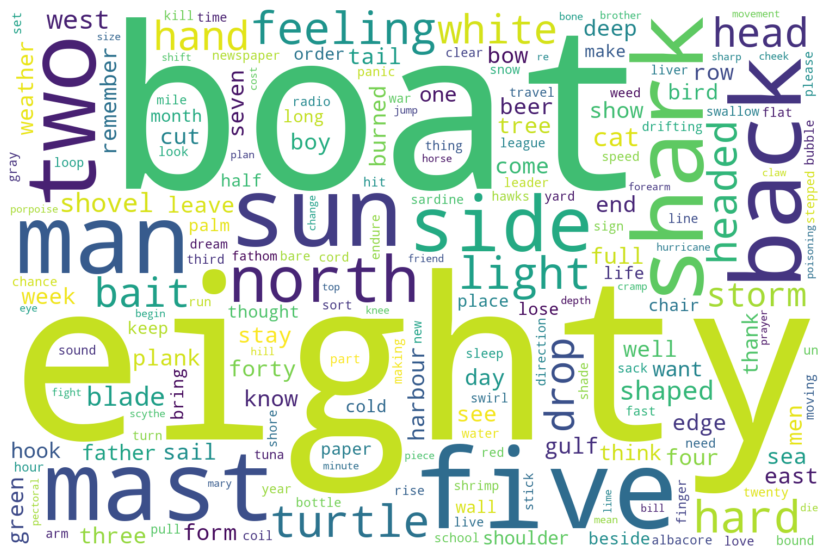

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# **Cloud-based NoCode-LowCode Tool**

In [72]:
from pandas import DataFrame
df = DataFrame(no_stop_words, columns=["old-man-sea-words"])
df.head()

,old-man-sea-words
0,old
1,man
2,sea
3,fished
4,alone


In [73]:
df.to_csv("old-man-sea-words.txt",index=False)

# **Plotly visualize**

***与word cloud同样的问题，no_stop_words是列表，只有word，没有frequency***

In [74]:
from plotly.offline import iplot
import plotly.graph_objs as go
import pandas as pd

In [75]:
fig = go.Figure(data=go.Bar(y=no_stop_words))
iplot(fig)

In [76]:
df = pd.read_csv("raw_word_count2.csv")
figure= go.Figure(data = go.Bar(x=df.word, y=df.frequency))
iplot(figure)

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
tips = pd.read_csv('raw_word_count2.csv')
tips.head()

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.3)
sns.barplot(x="word", y="frequency", data=tips, palette="Blues_d")